# QuTiP example: Quantum Process Tomography

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from qutip import *

In [4]:
"""
Plot the process tomography matrices for some 1, 2, and 3-qubit qubit gates.
"""
gates = [['C-NOT', cnot()],
         ['SWAP', swap()],
         ['$i$SWAP', iswap()],
         ['$\sqrt{i\mathrm{SWAP}}$', sqrtiswap()],
         ['S-NOT', snot()],
         ['$\pi/2$ phase gate', phasegate(np.pi/2)],
         ['Toffoli', toffoli()],
         ['Fredkin', fredkin()]]

In [5]:
def plt_qpt_gate(gate, figsize=(8,6)):

    name  = gate[0]
    U_psi = gate[1]
    
    N = len(U_psi.dims[0]) # number of qubits

    # create a superoperator for the density matrix
    # transformation rho = U_psi * rho_0 * U_psi.dag()
    U_rho = spre(U_psi) * spost(U_psi.dag())

    # operator basis for the process tomography
    op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()] for i in range(N)]

    # labels for operator basis
    op_label = [["$i$", "$x$", "$y$", "$z$"] for i in range(N)]

    # calculate the chi matrix
    chi = qpt(U_rho, op_basis)

    # visualize the chi matrix
    fig, ax = qpt_plot_combined(chi, op_label, name, figsize=figsize)
    
    ax.set_title(name)
    
    return fig, ax

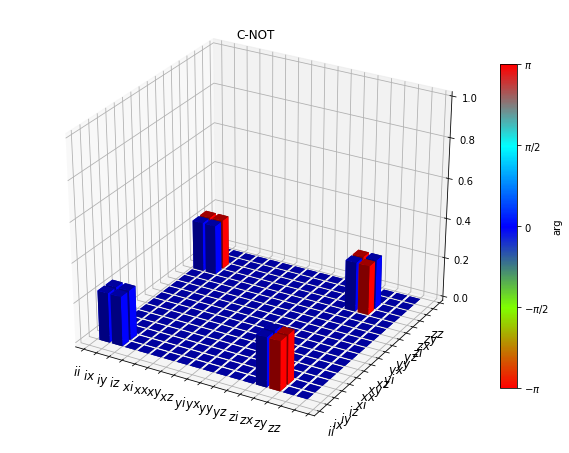

In [6]:
plt_qpt_gate(gates[0]);

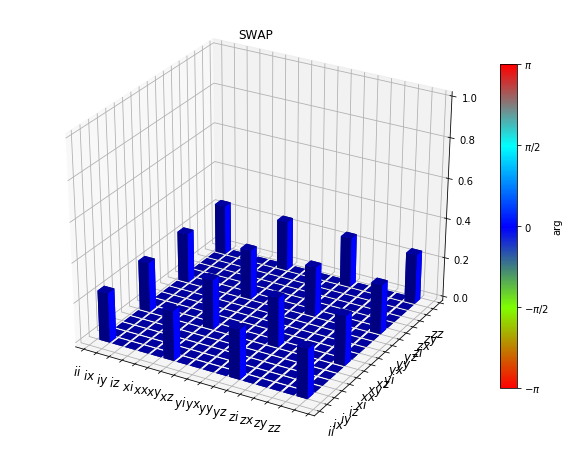

In [7]:
plt_qpt_gate(gates[1]);

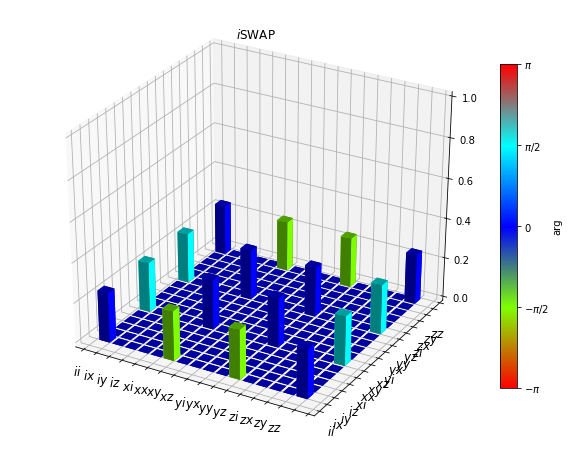

In [8]:
plt_qpt_gate(gates[2]);

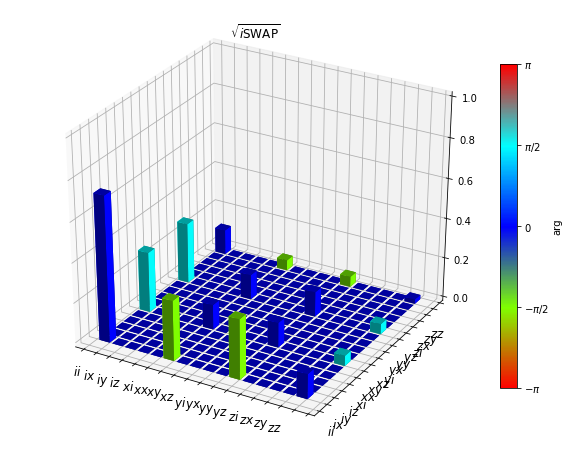

In [9]:
plt_qpt_gate(gates[3]);

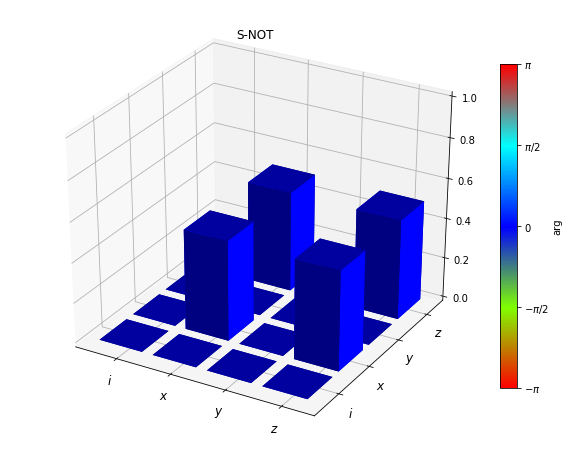

In [10]:
plt_qpt_gate(gates[4]);

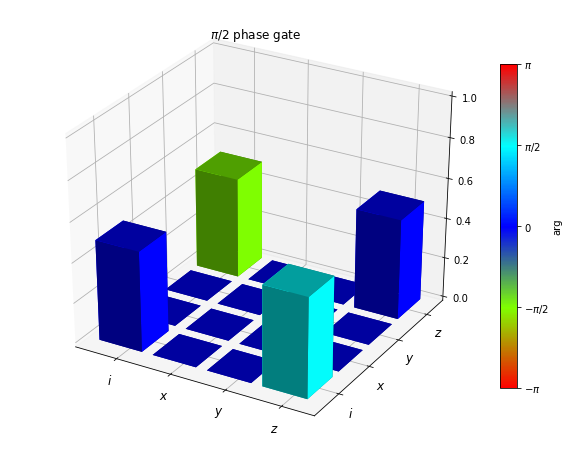

In [11]:
plt_qpt_gate(gates[5]);

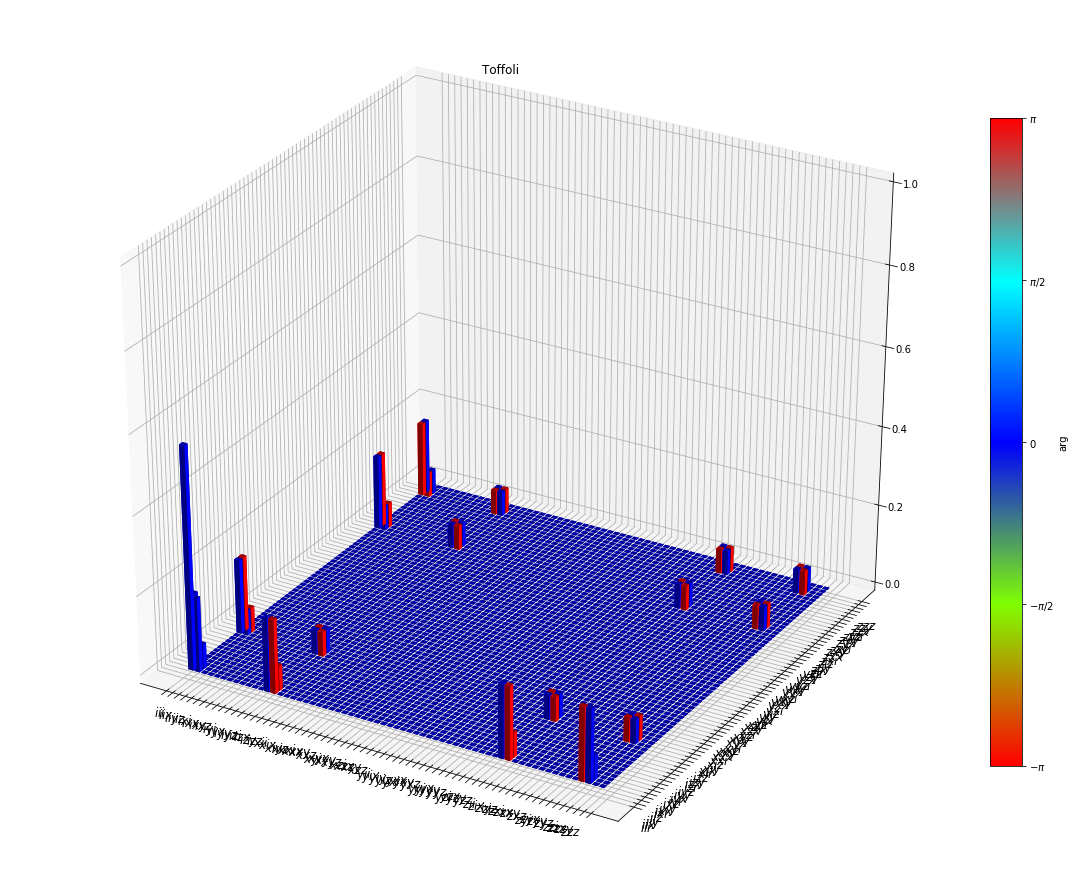

In [12]:
fig, ax = plt_qpt_gate(gates[6], figsize=(16,12))
ax.axis('tight');

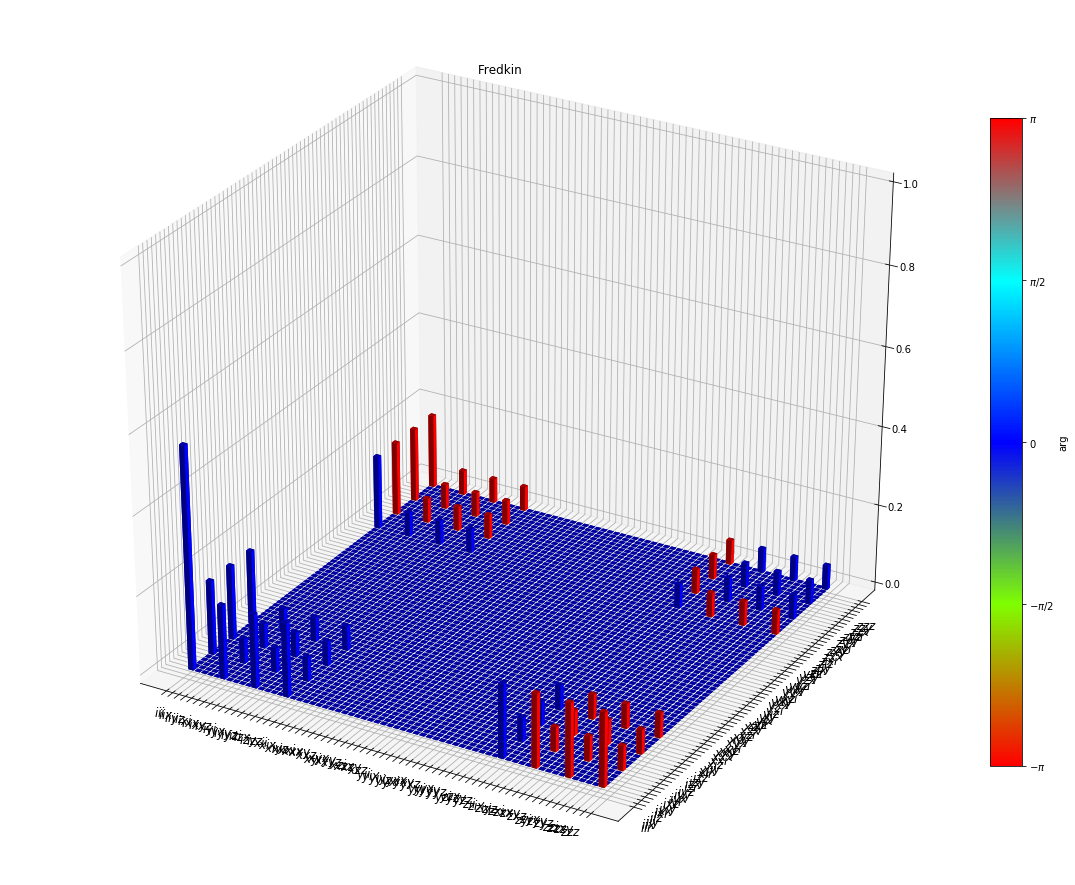

In [13]:
fig, ax = plt_qpt_gate(gates[7], figsize=(16,12))
ax.axis('tight');

## Versions

In [14]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
